In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

In [4]:
df = pd.read_csv("./Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
sum(df.duplicated())

0

In [6]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [7]:
df.describe(include="object").T

,count,unique,top,freq
loan_limit,145326,2,cf,135348
Gender,148670,4,Male,42346
approv_in_adv,147762,2,nopre,124621
loan_type,148670,3,type1,113173
loan_purpose,148536,4,p3,55934
Credit_Worthiness,148670,2,l1,142344
open_credit,148670,2,nopc,148114
business_or_commercial,148670,2,nob/c,127908
Neg_ammortization,148549,2,not_neg,133420
interest_only,148670,2,not_int,141560


In [8]:
pd.Series({col: df[col].unique() for col in df.select_dtypes("object").columns})

loan_limit                                                      [cf, nan, ncf]
Gender                                [Sex Not Available, Male, Joint, Female]
approv_in_adv                                                [nopre, pre, nan]
loan_type                                                [type1, type2, type3]
loan_purpose                                             [p1, p4, p3, p2, nan]
Credit_Worthiness                                                     [l1, l2]
open_credit                                                        [nopc, opc]
business_or_commercial                                            [nob/c, b/c]
Neg_ammortization                                      [not_neg, neg_amm, nan]
interest_only                                              [not_int, int_only]
lump_sum_payment                                              [not_lpsm, lpsm]
construction_type                                                     [sb, mh]
occupancy_type                                      

In [9]:
drop_cols  = ["ID", "Gender", "age", "Region"]
df = df.drop(drop_cols, axis = 1)

In [10]:
for col in df.select_dtypes("object").columns:
    df[col] = df[col].replace({val: i for i, val in enumerate(df[col].unique())}).value_counts()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 3 non-null       float64
 2   approv_in_adv              3 non-null       float64
 3   loan_type                  3 non-null       float64
 4   loan_purpose               5 non-null       float64
 5   Credit_Worthiness          2 non-null       float64
 6   open_credit                2 non-null       float64
 7   business_or_commercial     2 non-null       float64
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  Interest_rate_spread       112031 non-null  float64
 11  Upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          3 

In [12]:
nan_vals = df.isna().sum()/df.shape[0]
nan_vals

year                         0.000000
loan_limit                   0.999980
approv_in_adv                0.999980
loan_type                    0.999980
loan_purpose                 0.999966
Credit_Worthiness            0.999987
open_credit                  0.999987
business_or_commercial       0.999987
loan_amount                  0.000000
rate_of_interest             0.245100
Interest_rate_spread         0.246445
Upfront_charges              0.266644
term                         0.000276
Neg_ammortization            0.999980
interest_only                0.999987
lump_sum_payment             0.999987
property_value               0.101554
construction_type            0.999987
occupancy_type               0.999980
Secured_by                   0.999987
total_units                  0.999973
income                       0.061546
credit_type                  0.999973
Credit_Score                 0.000000
co-applicant_credit_type     0.999987
submission_of_application    0.999980
LTV         

In [13]:
nan_vals[nan_vals > 0.8].index

Index(['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'submission_of_application',
       'Security_Type'],
      dtype='object')

In [14]:
drop_cols = list(nan_vals[nan_vals > 0.8].index)
df = df.drop(drop_cols, axis = 1)

In [15]:
X = df.drop("Status", axis = 1)
y = df["Status"]

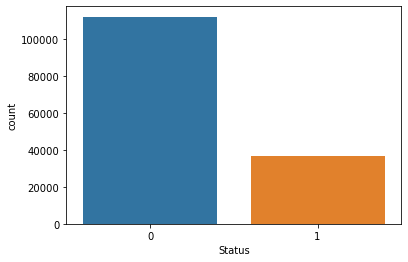

In [16]:
sns.countplot(x = df["Status"]);

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [18]:
X_train.isna().sum()

year                        0
loan_amount                 0
rate_of_interest        29156
Interest_rate_spread    29311
Upfront_charges         31709
term                       24
property_value          12082
income                   7338
Credit_Score                0
LTV                     12082
dtir1                   19315
dtype: int64

In [19]:
X_test.isna().sum()

year                       0
loan_amount                0
rate_of_interest        7283
Interest_rate_spread    7328
Upfront_charges         7933
term                      17
property_value          3016
income                  1812
Credit_Score               0
LTV                     3016
dtir1                   4806
dtype: int64

In [20]:
for col in X_train.columns:
    val = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(val)
    X_test[col] = X_test[col].fillna(val)

In [21]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

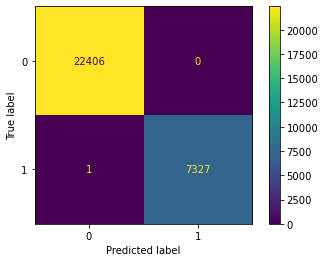

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [22]:
preds = dt.predict(X_test)

plot_confusion_matrix(dt, X_test, y_test)
plt.show()

print(classification_report(y_test, preds))

In [23]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

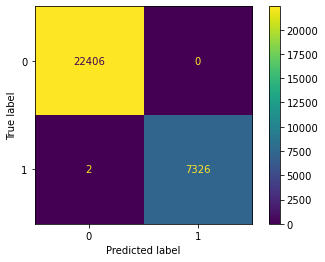

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22406
           1       1.00      1.00      1.00      7328

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



In [24]:
preds = rf.predict(X_test)

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

print(classification_report(y_test, preds))

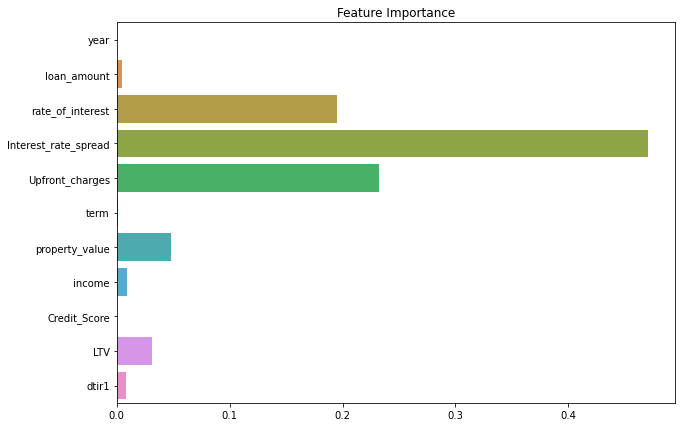

In [25]:
plt.figure(figsize=(10, 7))
sns.barplot(y=X_train.columns, x=rf.feature_importances_, )
plt.title("Feature Importance")
plt.show()

In [28]:
import tpot
print('tpot: %s' % tpot.__version__)

from sklearn.model_selection import RepeatedStratifiedKFold

tpot: 0.11.7


In [ ]:
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search
model = tpot.TPOTClassifier(generations=5, 
model = tpot.TPOTClassifier(generations=5, 
model = tpot.TPOTClassifier(Jupyter meetinggenerations=5, 
                       population_size=50, 
                       cv=cv, 
                       scoring='accuracy', 
                       verbosity=2, 
                       random_state=42)


...
# perform the search
model.fit(X_train, y_train)
# export the best model
model.export('defaulters.py')



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9999411451471847

Generation 2 - Current best internal CV score: 0.9999411451471847
